In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/balda/PROJECT FOR PORTOFOLIO/rhizomes_classification/dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
      'C:/Users/balda/PROJECT FOR PORTOFOLIO/rhizomes_classification/dataset/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluate the model
model.evaluate(validation_generator)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/20


c:\Users\balda\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.3167 - loss: 1.2521 - val_accuracy: 0.3333 - val_loss: 1.1481
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3495 - loss: 1.1087 - val_accuracy: 0.5000 - val_loss: 1.0822
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5883 - loss: 1.0526 - val_accuracy: 0.6167 - val_loss: 1.0322
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6269 - loss: 1.0080 - val_accuracy: 0.6500 - val_loss: 0.9850
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7318 - loss: 0.9640 - val_accuracy: 0.6500 - val_loss: 0.9387
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7461 - loss: 0.9334 - val_accuracy: 0.7167 - val_loss: 0.8969
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8415 - loss: 0.8855 - val_accuracy: 0.7833 - val_loss: 0.8588
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8406 - loss: 0.8457 - val_accuracy: 0.8000 - val_loss: 0.8236
Epoch 9/20
8/8 ━━━━

[0.5237604975700378, 0.9333333373069763]

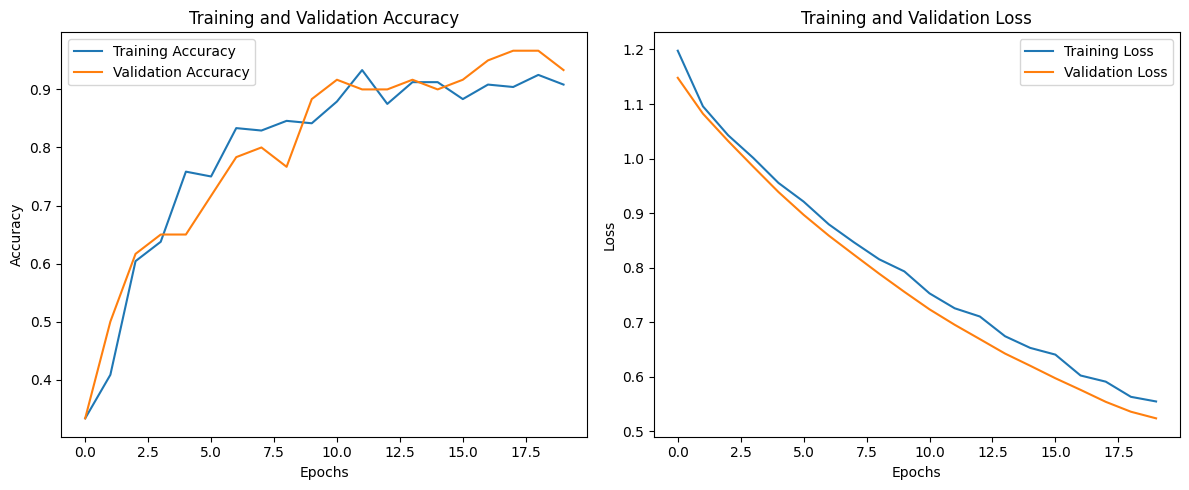

In [2]:
import matplotlib.pyplot as plt

# Extract the history dictionary
history_dict = history.history

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [3]:
model.save('rhizomes_model.h5')